# Social media Analysis
*© 2023 Keshava Pallavi Gone*


Social media marketing involves far more than a company’s presence on Facebook, Twitter, LinkedIn, or another channel. The conversation on social media should support the organization’s business goals, while maintaining a healthy balance of community-development and audience engagement to keep people interested. There should be an underlying focus on driving visitors further into the buying cycle, so that they are enticed to visit your website, download your eBook, attend your events, schedule a demo, or make a purchase. The results should be tracked and analyzed, so that you know that your time and resources are resulting in new business or improved customer relationships.




<h1>Objective 1: Scraping Tweets from Twitter </h1>
<h3>To get started to scrape tweets </h3>

1. Set up a Twitter account.
2. Using your Twitter account, you will need to apply for Developer Access and then create an application that will generate the API credentials that you will use to access Twitter from Python.

    consumer_key        = "************************** " </br>
    consumer_secret     = "************************** " </br>
    access_token        = "************************** " </br>
    access_token_secret = "********************* " </br>

<h3> Begin by importing the necessary Python libraries </h3>

Tweepy is a open source python package used to access Twitter API

In [2]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tweepy 
import pandas as pd

<h2> Challenge Question 1 </h2>

Access Twitter using your Twitter Credentials

In [4]:
CONSUMER_KEY = "XaOGWguQIvmEF2c9Vsd1wIeMS"
CONSUMER_SECRET_KEY = "NS3UXAyL1uRp3UOoWgwl77MElCGHcs6ku4YPXt9befKMEYTavF"
ACCESS_TOKEN = "1260624810331209728-PO5Xt0njCoLHhdsgYuBByblzatLqTW"
ACCESS_TOKEN_SECRET_KEY = "8oatlizi907UaD2oyelHCF0ttXxV3jRypjknblBDmIO9N"

Now, Authorize Tweepy to get access with Twitter. Tweepy will authorize your Twitter credentials to utilize its API.

In [5]:
# Twitter initialization

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET_KEY)
api = tweepy.API(auth, wait_on_rate_limit=True)

<h2> Scraping tweets from a specific Twitter account </h2>

Extract specific Twitter account(i.e., @ accountname or @username) and count is the max amount of most recent tweets you want to scrape from the specific user’s timeline

In [6]:
tweets = api.user_timeline(screen_name="@iphone_news", count=1)

In [8]:
print(tweets)

[Status(_api=<tweepy.api.API object at 0x7f8beb0977f0>, _json={'created_at': 'Fri Mar 03 00:18:33 +0000 2023', 'id': 1631448944575127553, 'id_str': '1631448944575127553', 'text': 'Another iPhone survives a week underwater after being accidentally dropped into a lake https://t.co/n1uatmkHTO', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/n1uatmkHTO', 'expanded_url': 'http://dlvr.it/SkGyLy', 'display_url': 'dlvr.it/SkGyLy', 'indices': [87, 110]}]}, 'source': '<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 15830701, 'id_str': '15830701', 'name': 'All Apple, Always | News, Reviews, Guides', 'screen_name': 'iPhone_News', 'location': 'New York, NY', 'description': 'All Apple, Always. News, reviews, guides, and more. Tweets by @justherrick

<h2> Challenge Question 2 </h2>

Extract 1000 tweets from <b>@iphone_news</b> timeline

In [9]:
tweets = api.user_timeline(screen_name="@iphone_news", count=100)


- id       : the unique ID  for every Tweet
- userid   : Unique ID provided for each Twitter account
- len      : length of the tweet
- date     : date of tweet
- source   : platform from where the user tweeted
- likes    : number of likes
- retweets : number of retweets (re-posting of the tweet)

In [10]:
import numpy as np

df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
df['id'] = np.array([tweet.id for tweet in tweets])
df['len'] = np.array([len(tweet.text) for tweet in tweets])
df['date'] = np.array([tweet.created_at for tweet in tweets])
df['source'] = np.array([tweet.source for tweet in tweets])
df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
df

,tweets,id,len,date,source,likes,retweets
0,Another iPhone survives a week underwater afte...,1631448944575127553,110,2023-03-03 00:18:33+00:00,dlvr.it,0,1
1,Tweetbot and Twitterrific Users Can Support th...,1631365898341875712,116,2023-03-02 18:48:34+00:00,dlvr.it,1,1
2,Thursday’s best deals: 12.9-inch M1 iPad Pro $...,1631351797758697472,117,2023-03-02 17:52:32+00:00,dlvr.it,1,0
3,"Fitbit is partially down again, crashing on iP...",1631343368612773893,75,2023-03-02 17:19:02+00:00,dlvr.it,1,0
4,Apple's Headset to Bring Continuity Features i...,1631324771920257025,92,2023-03-02 16:05:08+00:00,dlvr.it,3,0
...,...,...,...,...,...,...,...
95,Uber gets major update with simplified home sc...,1628394945362153474,115,2023-02-22 14:03:03+00:00,dlvr.it,5,1
96,Security Researchers Delve Into Major Vulnerab...,1628120385656066048,110,2023-02-21 19:52:03+00:00,dlvr.it,8,2
97,"iPhone 15 Rumored to Feature RAM Improvements,...",1628071311410073600,96,2023-02-21 16:37:03+00:00,dlvr.it,13,0
98,Apple's Popularity With Gen Z Poses Challenges...,1628063269465497601,82,2023-02-21 16:05:06+00:00,dlvr.it,7,1


You can now save the tweets in the csv file

In [11]:
df.to_csv('iphoneNews_tweets.csv')

In [12]:
 # Get average length over all tweets:
print(np.mean(df['len']))

    # Get the number of likes for the most liked tweet:
print(np.max(df['likes']))

    # Get the number of retweets for the most retweeted tweet:
print(np.max(df['retweets']))

100.89
15
5


h3> Twitter Analytics </h3>


<p><b>Liking</b> a post means that the person is agreeing to what you said. </p>
<b>Retweeting </b> is agreeing to your post and repeating what you said and promoting the content. Retweets provides opportunities for building your audience and furthering relationships. The more your tweet is retweeted, the more your message is magnified. Retweets are Twitter’s measurement for social relevancy.  are Twitter measurement of social relevancy.

Lets do analysis using number of likes per each tweet

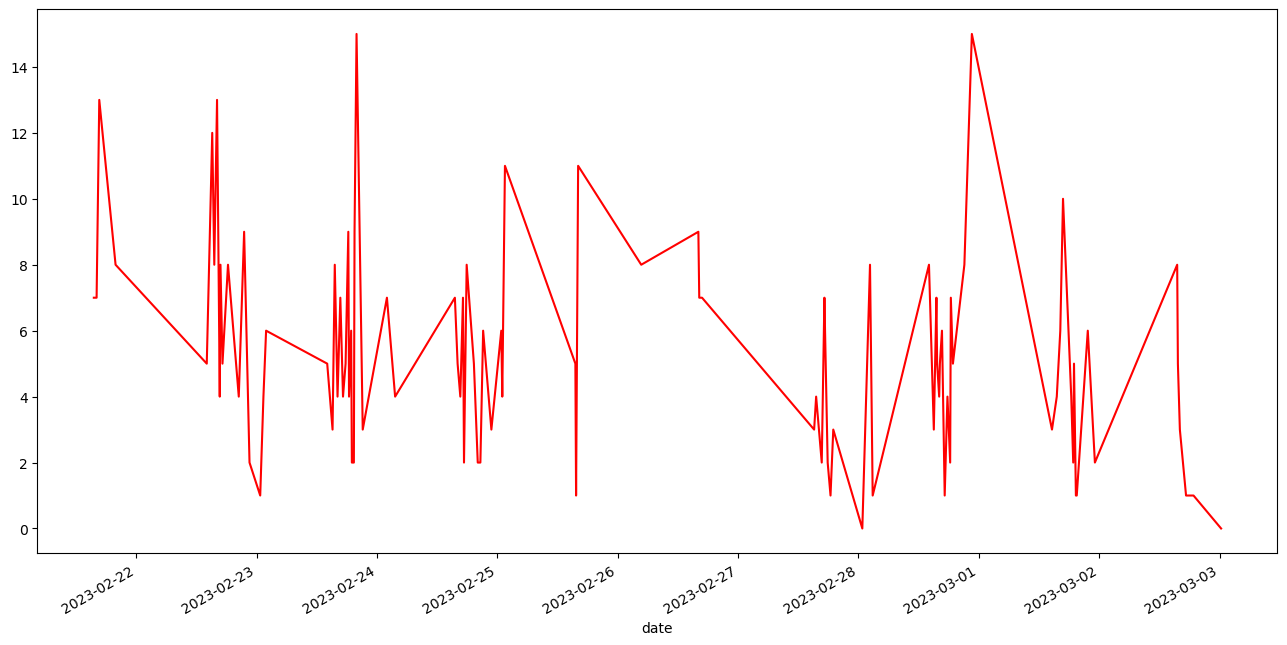

In [13]:
import matplotlib.pyplot as plt
   
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16, 8), color='r')
plt.show()


<h2> Challenge Question 3 </h2>

Visualize the analysis using number of retweets (blue colour)

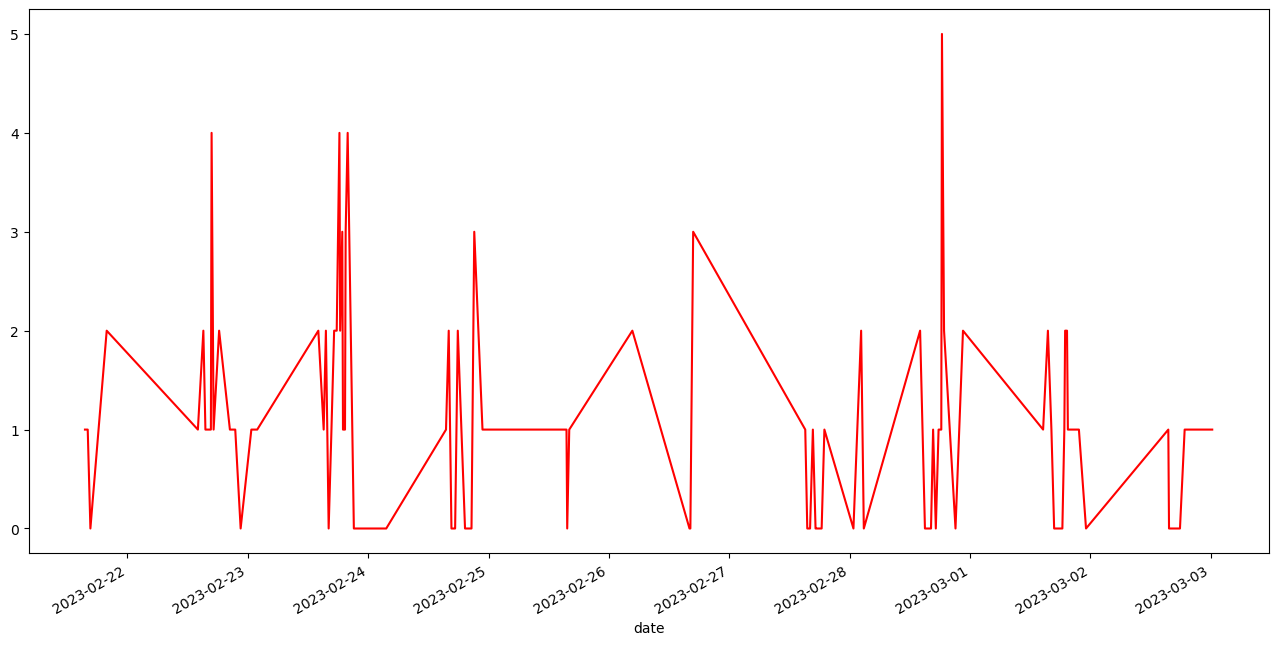

In [15]:
import matplotlib.pyplot as plt
   
time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 8), color='r')
plt.show()

#retweets

In [17]:
#analysis
# There is a lot fluctuation in engagement through RTs for the time period
# Maximum engagement was seen at some point b/w Feb 28 and March 1
# Mulitiple points where no engagement ocurred at all

We can also compare likes and retweets of each tweet. Just copy and paste the above two blocks of code to get  two-layered graph.

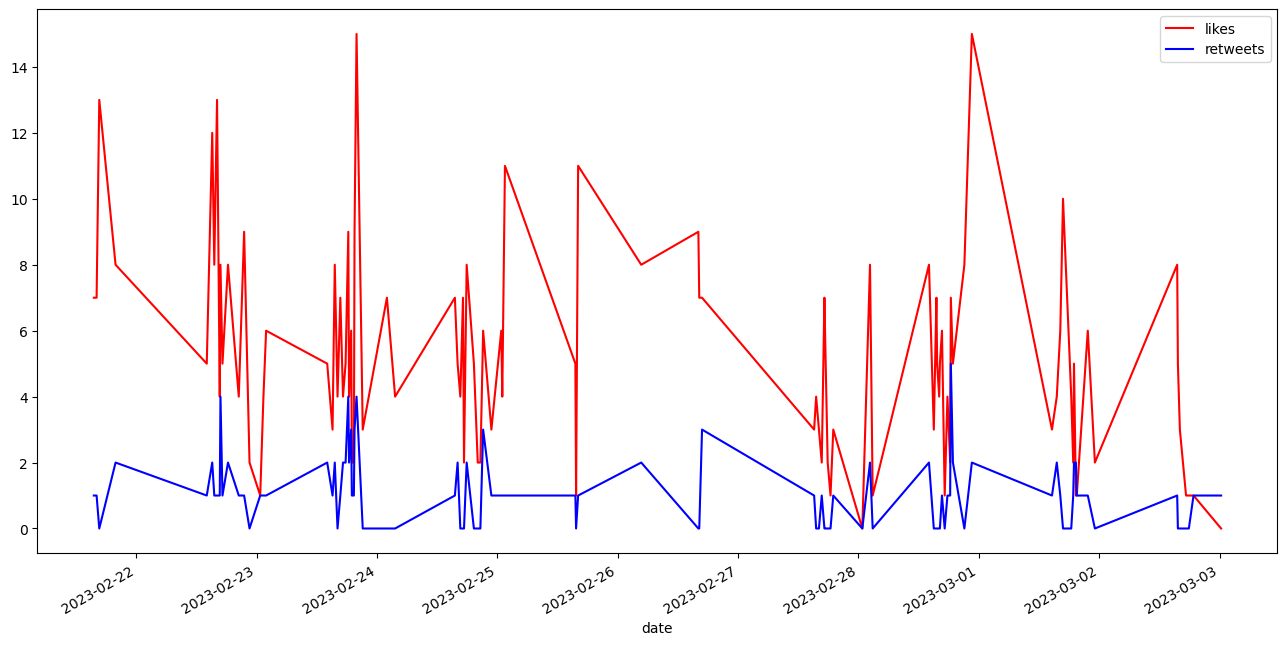

In [18]:
# Layered Time Series:
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16, 8), label="likes", legend=True, color='r')

time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 8), label="retweets", legend=True, color='b')
plt.show()

<h2>Scraping tweets from a text search query</h2>

In [19]:
tweets = api.search_tweets(q='iphone15pro', count=200)

In [20]:
df_2 = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
df_2 = pd.DataFrame([[tweet.text, tweet.created_at, tweet.id, tweet.user.id, tweet.created_at, tweet.source, tweet.favorite_count, tweet.retweet_count ] for tweet in tweets],columns=['tweets', 'Created_at' ,'id' , 'userid', 'date', 'source' ,'likes' , 'retweets'])


In [21]:
df_2

,tweets,Created_at,id,userid,date,source,likes,retweets
0,Check out what I'm selling: Apple AirPods Pro ...,2023-03-03 00:20:09+00:00,1631449345189969921,1596696607159980032,2023-03-03 00:20:09+00:00,Twitter for Android,0,0
1,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,2023-03-03 00:03:27+00:00,1631445142166024195,36143299,2023-03-03 00:03:27+00:00,Twitter Web App,0,356
2,@KbNueve87 @iphone15pro J’en peux plus de ce c...,2023-03-02 23:57:46+00:00,1631443713518886917,741035602834030593,2023-03-02 23:57:46+00:00,Twitter for iPhone,0,0
3,@mangeTaSoeeur @iphone15pro La mm ptdr,2023-03-02 23:56:17+00:00,1631443341224079364,1044278089801519106,2023-03-02 23:56:17+00:00,Twitter for iPhone,1,0
4,Pitie sors vite @iphone15pro je veux t’acheter...,2023-03-02 23:39:28+00:00,1631439108928163840,741035602834030593,2023-03-02 23:39:28+00:00,Twitter for iPhone,1,0
...,...,...,...,...,...,...,...,...
95,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,2023-03-02 11:17:34+00:00,1631252400026578944,18553607,2023-03-02 11:17:34+00:00,Twitter for Android,0,356
96,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,2023-03-02 11:15:36+00:00,1631251908835901443,942560894,2023-03-02 11:15:36+00:00,Twitter for iPhone,0,356
97,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,2023-03-02 11:06:49+00:00,1631249696898392064,775446186,2023-03-02 11:06:49+00:00,Twitter for Android,0,356
98,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,2023-03-02 11:00:49+00:00,1631248186873376773,27615054,2023-03-02 11:00:49+00:00,Twitter for iPhone,0,356


<h2> Challenge Question 4</h2>

 Download the <b>iphone15pro</b> tweets in csv file

In [22]:
df_2.to_csv('iphoneNews_topTweets.csv')#csv file

In [23]:
data = df_2[['tweets']]
data

,tweets
0,Check out what I'm selling: Apple AirPods Pro ...
1,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...
2,@KbNueve87 @iphone15pro J’en peux plus de ce c...
3,@mangeTaSoeeur @iphone15pro La mm ptdr
4,Pitie sors vite @iphone15pro je veux t’acheter...
...,...
95,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...
96,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...
97,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...
98,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...


In [24]:
data['hashtags'] = data.tweets.str.findall(r'(?<![#\w])#(\w{1,25})').apply(','.join)
data


/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_56250/2259360423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hashtags'] = data.tweets.str.findall(r'(?<![#\w])#(\w{1,25})').apply(','.join)


,tweets,hashtags
0,Check out what I'm selling: Apple AirPods Pro ...,mercari
1,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag"
2,@KbNueve87 @iphone15pro J’en peux plus de ce c...,
3,@mangeTaSoeeur @iphone15pro La mm ptdr,
4,Pitie sors vite @iphone15pro je veux t’acheter...,
...,...,...
95,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag"
96,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag"
97,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag"
98,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag"


<h2> Challenge question 5 </h2>

Create a new coloumn and extract mentions(@mention) from the tweets 

In [25]:
data['mentions'] = data.tweets.str.findall(r'(?<![#\w])#(\w{1,25})').apply(','.join)
data
# mentions

/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_56250/2643173092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mentions'] = data.tweets.str.findall(r'(?<![#\w])#(\w{1,25})').apply(','.join)


,tweets,hashtags,mentions
0,Check out what I'm selling: Apple AirPods Pro ...,mercari,mercari
1,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag"
2,@KbNueve87 @iphone15pro J’en peux plus de ce c...,,
3,@mangeTaSoeeur @iphone15pro La mm ptdr,,
4,Pitie sors vite @iphone15pro je veux t’acheter...,,
...,...,...,...
95,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag"
96,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag"
97,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag"
98,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag"


In [26]:
data.to_csv('iphoneNews_mentionsHashtags.csv')#csv file

<h2> Sentiment Analysis </h2>

To perform sentiment analysis, it is important to implement data preprocessing steps to clean the data, make the data ready for the analysis

In [27]:
import nltk
from nltk.corpus import stopwords
stpwrds = stopwords.words('english')

#convert the tweets to lowercase
data['tweet_lowercase'] = data['tweets'].str.lower()

#remove the noise(symbols, number, rt) from the tweets
data['tidy_tweet'] = data['tweet_lowercase'].str.replace("(@[A-Za-z0-9]+)|(\d+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(rt) ", " ")

#remove stopwords from the tweets
data['cleaned_tweet'] = data['tidy_tweet'].apply(lambda words: ' '.join([item for item in words.split() if item not in stpwrds]))

data

/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_56250/2656484143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_lowercase'] = data['tweets'].str.lower()
/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_56250/2656484143.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tidy_tweet'] = data['tweet_lowercase'].str.replace("(@[A-Za-z0-9]+)|(\d+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(rt) ", " ")
/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_56250/2656484143.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,tweets,hashtags,mentions,tweet_lowercase,tidy_tweet,cleaned_tweet
0,Check out what I'm selling: Apple AirPods Pro ...,mercari,mercari,check out what i'm selling: apple airpods pro ...,check out what i m selling apple airpods pro ...,check selling apple airpods pro nd generation ...
1,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag",rt @tecknet5: #giveaway hello march!\n🎁bluetoo...,giveaway hello march bluetooth earphone...,giveaway hello march bluetooth earphones enter...
2,@KbNueve87 @iphone15pro J’en peux plus de ce c...,,,@kbnueve87 @iphone15pro j’en peux plus de ce c...,j en peux plus de ce club on a pas le droi...,j en peux plus de ce club pas le droit au bonh...
3,@mangeTaSoeeur @iphone15pro La mm ptdr,,,@mangetasoeeur @iphone15pro la mm ptdr,la mm ptdr,la mm ptdr
4,Pitie sors vite @iphone15pro je veux t’acheter...,,,pitie sors vite @iphone15pro je veux t’acheter...,pitie sors vite je veux t acheter pour me re...,pitie sors vite je veux acheter pour remonter ...
...,...,...,...,...,...,...
95,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag",rt @tecknet5: #giveaway hello march!\n🎁bluetoo...,giveaway hello march bluetooth earphone...,giveaway hello march bluetooth earphones enter...
96,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag",rt @tecknet5: #giveaway hello march!\n🎁bluetoo...,giveaway hello march bluetooth earphone...,giveaway hello march bluetooth earphones enter...
97,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag",rt @tecknet5: #giveaway hello march!\n🎁bluetoo...,giveaway hello march bluetooth earphone...,giveaway hello march bluetooth earphones enter...
98,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag",rt @tecknet5: #giveaway hello march!\n🎁bluetoo...,giveaway hello march bluetooth earphone...,giveaway hello march bluetooth earphones enter...


<b>VADER dictionary</b> is a model used for text sentiment analysis that provides sentiment scores based on the words used.

The below code imported VADER dictionary to calculate compound polarity (sentiment score) for each word in the tweet and classify the tweet as positive,negative or neutral

In [28]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/samibashir/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

sid = SentimentIntensityAnalyzer()


data['sentiment_compound_polarity']=data.cleaned_tweet.apply(lambda x:sid.polarity_scores(x)['compound'])


overall=[]
for i in range(len(data)):
    if data['sentiment_compound_polarity'][i]>= 0.05:
        overall.append('Positive')
    elif data['sentiment_compound_polarity'][i]<= -0.05:
        overall.append('Negative')
    else:
        overall.append('Neutral')
data['Overall Sentiment']=overall
data.head(20)

/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_56250/2279424929.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_compound_polarity']=data.cleaned_tweet.apply(lambda x:sid.polarity_scores(x)['compound'])


,tweets,hashtags,mentions,tweet_lowercase,tidy_tweet,cleaned_tweet,sentiment_compound_polarity,Overall Sentiment
0,Check out what I'm selling: Apple AirPods Pro ...,mercari,mercari,check out what i'm selling: apple airpods pro ...,check out what i m selling apple airpods pro ...,check selling apple airpods pro nd generation ...,0.0000,Neutral
1,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag",rt @tecknet5: #giveaway hello march!\n🎁bluetoo...,giveaway hello march bluetooth earphone...,giveaway hello march bluetooth earphones enter...,0.8442,Positive
2,@KbNueve87 @iphone15pro J’en peux plus de ce c...,,,@kbnueve87 @iphone15pro j’en peux plus de ce c...,j en peux plus de ce club on a pas le droi...,j en peux plus de ce club pas le droit au bonh...,0.0000,Neutral
3,@mangeTaSoeeur @iphone15pro La mm ptdr,,,@mangetasoeeur @iphone15pro la mm ptdr,la mm ptdr,la mm ptdr,0.0000,Neutral
4,Pitie sors vite @iphone15pro je veux t’acheter...,,,pitie sors vite @iphone15pro je veux t’acheter...,pitie sors vite je veux t acheter pour me re...,pitie sors vite je veux acheter pour remonter ...,0.0000,Neutral
5,RT @Apple_Geek_Actu: 🔴Les #iPhone15Pro donnera...,iPhone15Pro,iPhone15Pro,rt @apple_geek_actu: 🔴les #iphone15pro donnera...,geek actu les iphone pro donneraient env...,geek actu les iphone pro donneraient envie de ...,-0.2023,Negative
6,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag",rt @tecknet5: #giveaway hello march!\n🎁bluetoo...,giveaway hello march bluetooth earphone...,giveaway hello march bluetooth earphones enter...,0.8442,Positive
7,RT @TECKNET5: #Giveaway Hello March!\n🎁Bluetoo...,"Giveaway,Follow,RT,Tag","Giveaway,Follow,RT,Tag",rt @tecknet5: #giveaway hello march!\n🎁bluetoo...,giveaway hello march bluetooth earphone...,giveaway hello march bluetooth earphones enter...,0.8442,Positive
8,RT @rivervisual_id: Can you spot the different...,"iphone15,iphone15pro,appleleaks,i","iphone15,iphone15pro,appleleaks,i",rt @rivervisual_id: can you spot the different...,id can you spot the different right...,id spot different right iphone left iphone iph...,0.0000,Neutral
9,RT @TechScoreNY: How's dis' for a design ?? 👍👎...,"iphone15pro,appleiphone,concept","iphone15pro,appleiphone,concept",rt @techscoreny: how's dis' for a design ?? 👍👎...,how s dis for a design iphone pro ...,dis design iphone pro appleiphone concept,0.0000,Neutral


/Users/samibashir/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall Sentiment', ylabel='count'>

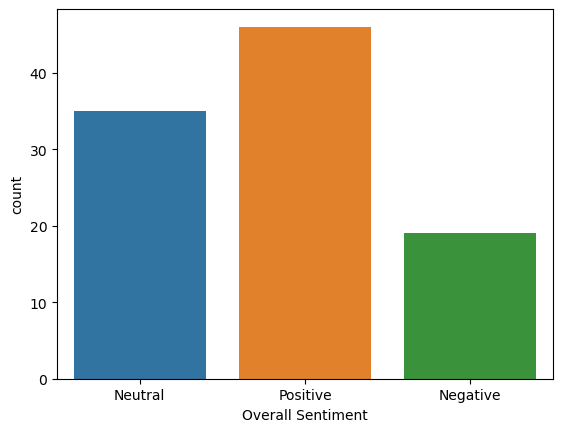

In [30]:
import seaborn as sns
sns.countplot(data['Overall Sentiment'])

In [ ]:
# Positive Overall Sentiment seems to occur the most frequently
# Neutral Sentiment seems to be 2nd 
# Negative Sentinment ranks last